In [1]:
import numpy as np
#model parameters
input_size= 3 #no of features
layers = [4,3] #no of neurons in first and second layer
output_size=2
# hence its a 3 layer network (2 hidden + 1 output layer)




In [2]:
def softmax(a): # e^a(i)/ summation of e^a(i)
  e_pa=np.exp(a) #vector if 'a' is a vector.
  ans=e_pa/np.sum(e_pa,axis=1,keepdims=True)
  return ans


  

In [3]:
#example to check what keepdims do
a=np.array([[5,1,2],[6,1,2]])
print(np.sum(a,axis=1))
print("keepdims=True ->" , np.sum(a,axis=1,keepdims=True))
#we can see that keepdims retains the shape

[8 9]
keepdims=True -> [[8]
 [9]]


In [4]:
#example for softmax working
a=np.array([[10,10],[20,20]])
a_=softmax(a)
print(a_)

b=np.array([[10,20]])
b_=softmax(b)
print(b_)

[[0.5 0.5]
 [0.5 0.5]]
[[4.53978687e-05 9.99954602e-01]]


In [5]:
class NeuralNetwork:

  def __init__(self,input_size,layers,output_size):
    np.random.seed(0) #to retain the same initialisation everytime for different inputs
    model={} #dictionary

    model['W1'] = np.random.randn(input_size,layers[0]) 
    #randomly initialises from normal distribution
    # and creates a matrix of size input_size x layer[0] i.e 3 x 4
    model['b1'] =np.zeros((1,layers[0])) #bias

    model['W2'] = np.random.randn(layers[0],layers[1]) 
    model['b2'] =np.zeros((1,layers[1])) #bias

    model['W3'] = np.random.randn(layers[1],output_size) 
    model['b3'] =np.zeros((1,output_size)) #bias

    self.model=model



  #FORWARD PROPOGATION
  def forward(self,x): 

    W1,W2,W3  = self.model['W1'],self.model['W2'],self.model['W3']
    b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']

    z1= np.dot(x,W1)+b1
    a1= np.tanh(z1) #activation function. we can use either sigmoid or tanh or reLu

    z2=np.dot(a1,W2)+b2
    a2=np.tanh(z2)

    z3=np.dot(a2,W3)+b3
    y_ = softmax(z3) #how probable is each answer between 0 and 1

    self.activation_outputs=(a1,a2,y_)
    return y_

  #BACKWARD PROPOGATION!
  def backward(self,x,y,learning_rate=0.001):
    W1,W2,W3  = self.model['W1'],self.model['W2'],self.model['W3']
    b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
    m=x.shape[0]
    a1,a2,y_ = self.activation_outputs

    delta3= y_-y
    dw3 = np.dot(a2.T,delta3)
    db3= np.sum(delta3,axis=0)

    delta2= (1-np.square(a2)) * np.dot(delta3,W3.T)
    #derivative of tanh = 1 - (tanh)^2.....a2 is 
    dw2= np.dot(a1.T,delta2)
    db2=np.sum(delta2,axis=0)

    delta1 = (1-np.square(a1)) * np.dot(delta2,W2.T)
    dw1= np.dot(x.T,delta1)
    db1=np.sum(delta1,axis=0)

    #Update the model parameters using Gradient Descent
    self.model["W1"] -= learning_rate*dw1
    self.model["b1"] -= learning_rate*db1

    self.model["W2"] -= learning_rate*dw2
    self.model["b2"] -= learning_rate*db2

    self.model["W3"] -= learning_rate*dw3
    self.model["b3"] -= learning_rate*db3 
    
    # :)

  
  def predict(self,x):
    y_out=self.forward(x)

    return np.argmax(y_out,axis=1)
  
  def summary(self):
    W1,W2,W3  = self.model['W1'],self.model['W2'],self.model['W3']
    a1,a2,y_ = self.activation_outputs

    print("W1 ",W1.shape)
    print("A1 ",a1.shape)

    print("W2 ",W2.shape)
    print("A2 ",a2.shape)

    print("W3 ",W3.shape)
    print("Y_ ",y_.shape)




In [6]:
def loss(y_oht,p): #y_oht= one hot vectors of each example , p is the predicted probability
  #we will use categorical cross entropy loss, as MSE loss is non-convex(has multiple minimas)
  l = -np.mean(y_oht*np.log(p))
  return l


In [7]:
def one_hot(y,depth):
  y_oht=np.zeros((y.shape[0],depth))
  y_oht[np.arange(y.shape[0]),y]=1
  return y_oht

In [8]:
#example
#a=np.array([1,0,0,1,1,1,1,0,0,0,1,1])
#print(one_hot(a,2))

#Generating Data

In [9]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [10]:
X,Y = make_circles(n_samples=500,shuffle=True,noise=0.2,random_state=1,factor=0.2)

In [11]:
print(X.shape,Y.shape)

(500, 2) (500,)


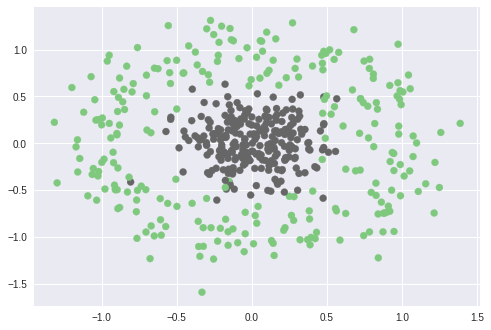

In [12]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

#Training our Model

In [13]:
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [14]:
#probability example for 1 example
model.forward(X[0])

array([[0.52335135, 0.47664865]])

In [15]:
model.summary()

W1  (2, 10)
A1  (1, 10)
W2  (10, 5)
A2  (1, 5)
W3  (5, 2)
Y_  (1, 2)


In [16]:
def train(X,Y,model,epochs,learning_rate,logs=True):
  training_loss=[]

  classes=2
  Y_OHT= one_hot(Y,classes)

  for ix in range(epochs):

    Y_=model.forward(X)
    l= loss(Y_OHT,Y_)
    training_loss.append(l)
    model.backward(X,Y_OHT,learning_rate)


    if(logs):
      print("Epoch %d Loss %.4f"%(ix,l))

  return training_loss

In [17]:
losses=train(X,Y,model,300,0.001)

Epoch 0 Loss 0.3571
Epoch 1 Loss 0.3554
Epoch 2 Loss 0.2593
Epoch 3 Loss 0.2407
Epoch 4 Loss 0.2258
Epoch 5 Loss 0.2132
Epoch 6 Loss 0.2020
Epoch 7 Loss 0.1919
Epoch 8 Loss 0.1827
Epoch 9 Loss 0.1742
Epoch 10 Loss 0.1664
Epoch 11 Loss 0.1593
Epoch 12 Loss 0.1527
Epoch 13 Loss 0.1467
Epoch 14 Loss 0.1411
Epoch 15 Loss 0.1360
Epoch 16 Loss 0.1313
Epoch 17 Loss 0.1270
Epoch 18 Loss 0.1230
Epoch 19 Loss 0.1193
Epoch 20 Loss 0.1159
Epoch 21 Loss 0.1127
Epoch 22 Loss 0.1098
Epoch 23 Loss 0.1070
Epoch 24 Loss 0.1045
Epoch 25 Loss 0.1021
Epoch 26 Loss 0.0999
Epoch 27 Loss 0.0978
Epoch 28 Loss 0.0958
Epoch 29 Loss 0.0940
Epoch 30 Loss 0.0922
Epoch 31 Loss 0.0906
Epoch 32 Loss 0.0891
Epoch 33 Loss 0.0876
Epoch 34 Loss 0.0862
Epoch 35 Loss 0.0849
Epoch 36 Loss 0.0837
Epoch 37 Loss 0.0825
Epoch 38 Loss 0.0814
Epoch 39 Loss 0.0803
Epoch 40 Loss 0.0793
Epoch 41 Loss 0.0783
Epoch 42 Loss 0.0774
Epoch 43 Loss 0.0765
Epoch 44 Loss 0.0756
Epoch 45 Loss 0.0748
Epoch 46 Loss 0.0740
Epoch 47 Loss 0.0732
Ep

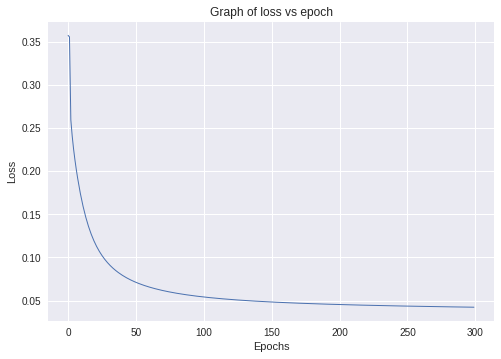

In [18]:
plt.plot(losses,linewidth=1)
plt.title("Graph of loss vs epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [19]:
#Written by prateek bhaiya
def plot_decision_boundary(model, X, y,cmap=plt.cm.jet):
    """
    Given a model(a function) and a set of points(X), corresponding labels(y), scatter the points in X with color coding
    according to y. Also use the model to predict the label at grid points to get the region for each label, and thus the 
    descion boundary.
    Example usage:
    say we have a function predict(x,other params) which makes 0/1 prediction for point x and we want to plot
    train set then call as:
    plot_decision_boundary(lambda x:predict(x,other params),X_train,Y_train)
    params(3): 
        model : a function which expectes the point to make 0/1 label prediction
        X : a (mx2) numpy array with the points
        y : a (mx1) numpy array with labels
    outputs(None)
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.style.use("seaborn")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet)

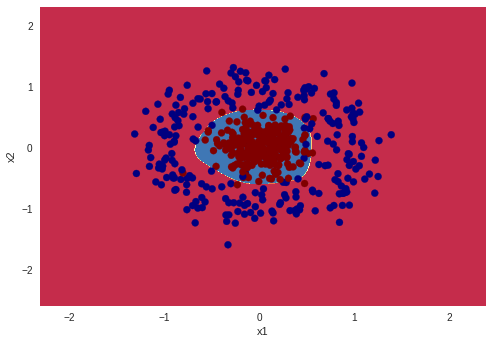

In [20]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [21]:
outputs = model.predict(X)

In [22]:
training_accuracy=np.sum(outputs==Y)/Y.shape[0]
print("Training accuracy %.4f"%(training_accuracy*100))


Training accuracy 97.0000


# Testing on other non-linear datasets

In [23]:
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

##XOR Dataset

In [24]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]
              ])

In [25]:
Y=np.array([0,1,1,0])

In [29]:
losses=train(X,Y,model,300,0.01)

Epoch 0 Loss 0.0878
Epoch 1 Loss 0.0869
Epoch 2 Loss 0.0860
Epoch 3 Loss 0.0851
Epoch 4 Loss 0.0843
Epoch 5 Loss 0.0835
Epoch 6 Loss 0.0826
Epoch 7 Loss 0.0818
Epoch 8 Loss 0.0810
Epoch 9 Loss 0.0802
Epoch 10 Loss 0.0795
Epoch 11 Loss 0.0787
Epoch 12 Loss 0.0779
Epoch 13 Loss 0.0772
Epoch 14 Loss 0.0765
Epoch 15 Loss 0.0757
Epoch 16 Loss 0.0750
Epoch 17 Loss 0.0743
Epoch 18 Loss 0.0736
Epoch 19 Loss 0.0730
Epoch 20 Loss 0.0723
Epoch 21 Loss 0.0716
Epoch 22 Loss 0.0710
Epoch 23 Loss 0.0703
Epoch 24 Loss 0.0697
Epoch 25 Loss 0.0691
Epoch 26 Loss 0.0685
Epoch 27 Loss 0.0679
Epoch 28 Loss 0.0673
Epoch 29 Loss 0.0667
Epoch 30 Loss 0.0661
Epoch 31 Loss 0.0655
Epoch 32 Loss 0.0650
Epoch 33 Loss 0.0644
Epoch 34 Loss 0.0639
Epoch 35 Loss 0.0633
Epoch 36 Loss 0.0628
Epoch 37 Loss 0.0622
Epoch 38 Loss 0.0617
Epoch 39 Loss 0.0612
Epoch 40 Loss 0.0607
Epoch 41 Loss 0.0602
Epoch 42 Loss 0.0597
Epoch 43 Loss 0.0592
Epoch 44 Loss 0.0588
Epoch 45 Loss 0.0583
Epoch 46 Loss 0.0578
Epoch 47 Loss 0.0574
Ep

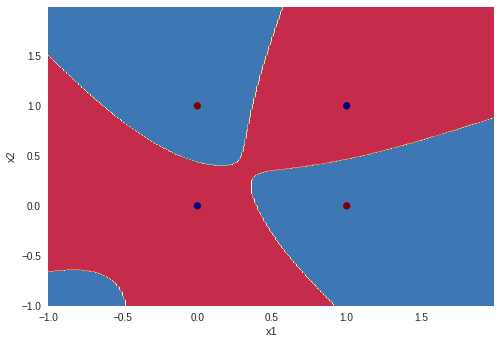

In [30]:
plot_decision_boundary(lambda x: model.predict(x),X,Y)

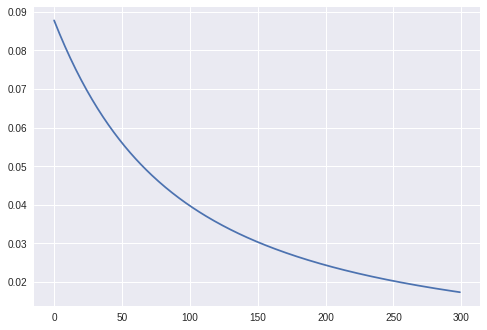

In [31]:
plt.plot(losses)

##Other Datasets

In [32]:
from sklearn.datasets import make_moons,make_circles,make_classification

In [40]:
def load_dataset(dataset):

  if dataset=="moons":
    X,Y= make_moons(n_samples=500,noise=0.2,random_state=1)

  elif dataset=="circles":
    X,Y= make_circles(n_samples=500,shuffle=True,noise=0.2,random_state=1,factor=0.2)
  
  elif dataset=="classification":
    X,Y= make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
  
  else:
    X= np.array([[0,0],[0,1],[1,0],[1,1]])
    Y=np.array([0,1,1,0])
  
  return X,Y

Training accuracy 100.0000


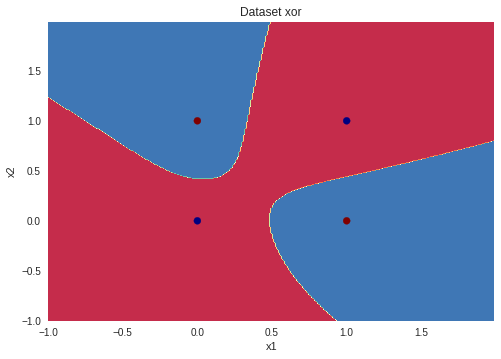

Training accuracy 96.0000


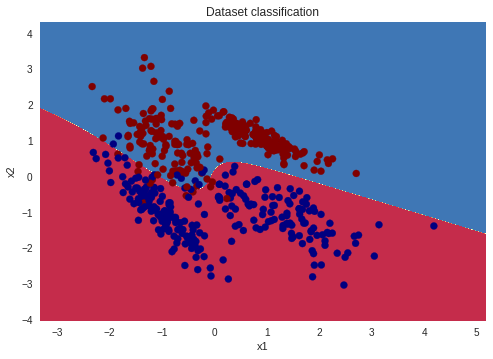

Training accuracy 97.4000


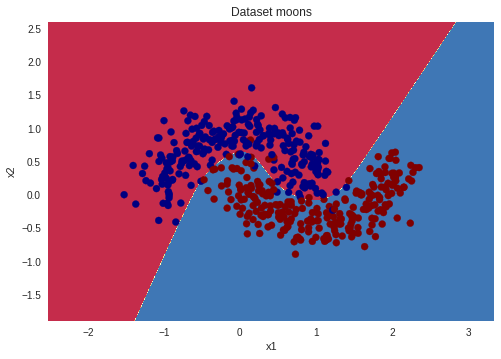

Training accuracy 96.4000


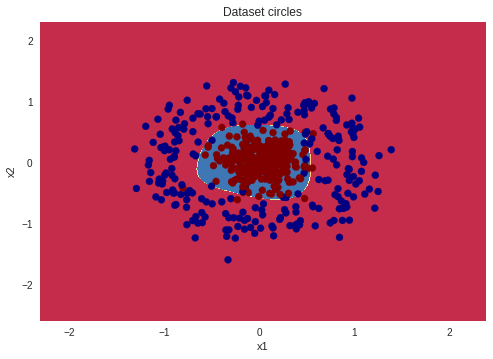

In [44]:
datasets = ["xor","classification","moons","circles"]

for d in datasets:
  model=NeuralNetwork(input_size=2,layers=[4,3],output_size=2)

  X,Y= load_dataset(d)
  train(X,Y,model,1000,0.001,logs=False)
  outputs = model.predict(X)
  training_accuracy = np.sum(outputs==Y)/Y.shape[0]
  print("Training accuracy %.4f"%(training_accuracy*100))

  plt.title("Dataset "+d)
  plot_decision_boundary(lambda x:model.predict(x),X,Y)
  plt.show()